# Analysis of Video Game Sales and Popularity

## Explorary Data Analysis

### Importing Necessary Libraries

In [1]:
#Data Preprocessing 
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

#Model Development
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
import sklearn.model_selection as ms

#Linear Regession
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

#SVC

#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn import metrics

#Random Forest
from sklearn.preprocessing import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings

#Gradient Boosting 
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [2]:
vg = pd.read_csv("video_games_sales.csv") #vg = video games 
vg = vg.rename(columns = {"rank": "Sales Rank", "na_sales": "North American Sales (in millions)", "eu_sales": "European Sales (in millions)", 
                          "jp_sales": "Japan Sales (in millions)", "other_sales": "Other Sales (in millions)", 
                          "global_sales": "Global Sales (in millions)"})
print(f"Columns Names in the Dataframe:\n{vg.columns.tolist()}\n")
print(f"Quantity of of null/missing data entries:\n{vg.isnull().sum()}")
print(f"Data Types and Quantity of Data:\n{vg.info()}\n") #shows all variables in the dataset, the quantity of non-null data points in each variables, and the amount of each data type
print(f"Column Names in the Dataset\n{vg.columns.tolist()}\n")
print("Summary Stats of the Numeric Variables:\n")
vg.describe().T

Columns Names in the Dataframe:
['Sales Rank', 'name', 'platform', 'year', 'genre', 'publisher', 'North American Sales (in millions)', 'European Sales (in millions)', 'Japan Sales (in millions)', 'Other Sales (in millions)', 'Global Sales (in millions)']

Quantity of of null/missing data entries:
Sales Rank                              0
name                                    0
platform                                0
year                                  271
genre                                   0
publisher                              58
North American Sales (in millions)      0
European Sales (in millions)            0
Japan Sales (in millions)               0
Other Sales (in millions)               0
Global Sales (in millions)              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              ------------

,count,mean,std,min,25%,50%,75%,max
Sales Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
North American Sales (in millions),16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
European Sales (in millions),16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
Japan Sales (in millions),16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other Sales (in millions),16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global Sales (in millions),16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


As seen in the table above, the variable *year* has some missing data points, this will be addressed during model development when the missing data will be replaced with imputed values using available *year* data. Platform will be one-hot encoded to address its missing values.

Furthermore, many variable names have been changed for easier understanding of what each variable tracks. 

In [3]:
vg.head()

,Sales Rank,name,platform,year,genre,publisher,North American Sales (in millions),European Sales (in millions),Japan Sales (in millions),Other Sales (in millions),Global Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


First five rows of data

In [4]:
vg.tail()

,Sales Rank,name,platform,year,genre,publisher,North American Sales (in millions),European Sales (in millions),Japan Sales (in millions),Other Sales (in millions),Global Sales (in millions)
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Last five rows of data

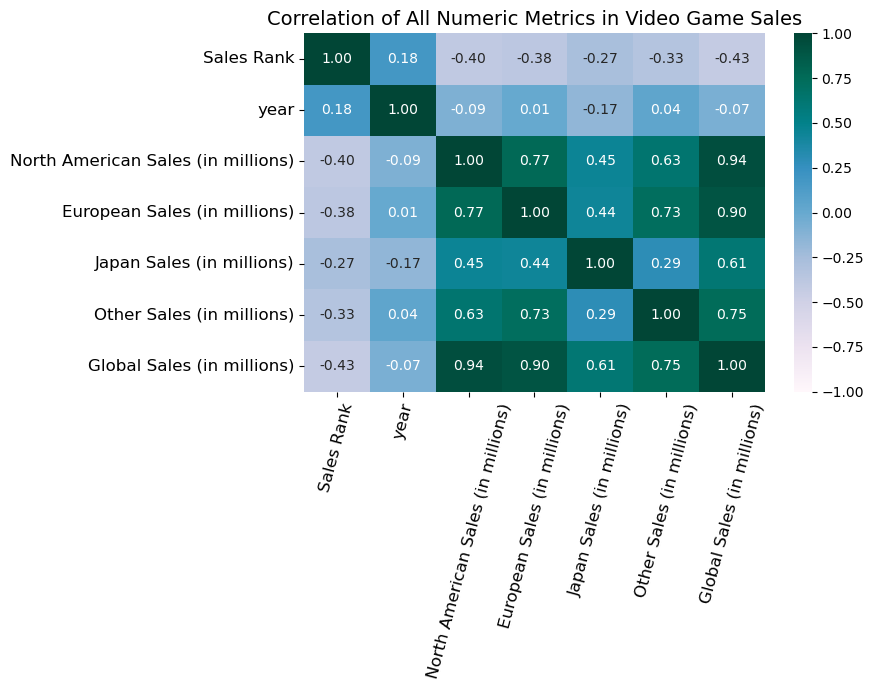

In [5]:
numeric_vg = vg.select_dtypes(include = ["int64", "float64"])
corr_matrix = numeric_vg.corr()
plt.figure(figsize = (9,7))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", fmt = ".2f", vmin = -1, vmax = 1)
plt.title("Correlation of All Numeric Metrics in Video Game Sales", fontsize = 14)
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.savefig("Correlation of All Numeric Metrics in Video Game Sales.png", bbox_inches = "tight", dpi = 300)
plt.show()

The correlation matrix above shows a moderate to correlation between each regional sale and global sales, this expected since each regional sale is used to calculate the overall global sales. Global Sales and Other Sales will be removed during model development to reduce the chances of collinearity and an unfair skew.

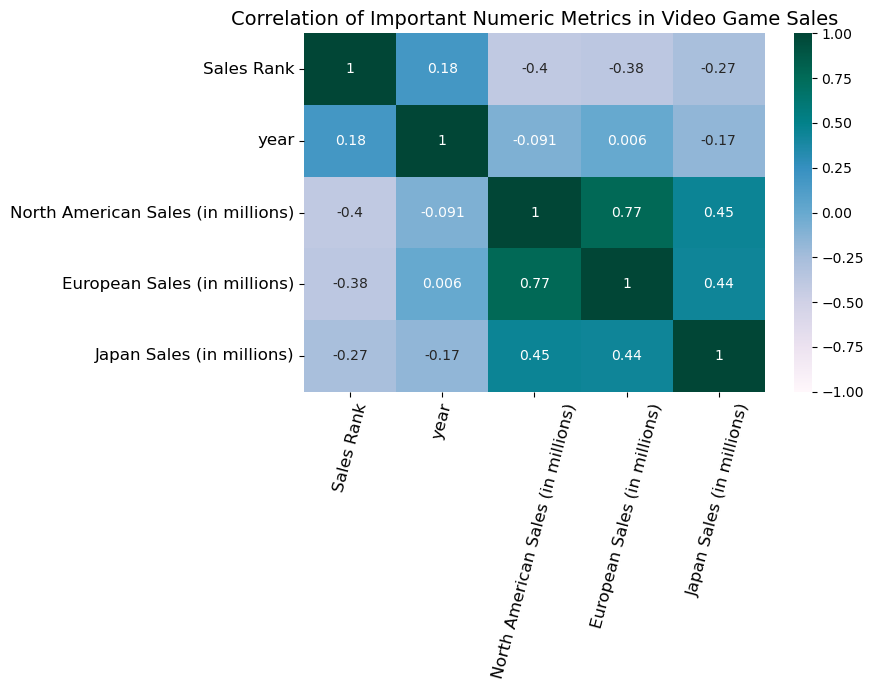

In [6]:
numeric_vg1 = vg.select_dtypes(include = ["int64", "float64"])
numeric_vg2 = numeric_vg1.drop(columns = ["Other Sales (in millions)", "Global Sales (in millions)"])
corr_matrix = numeric_vg2.corr()
plt.figure(figsize = (9,7))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", vmin = -1, vmax = 1)
plt.title("Correlation of Important Numeric Metrics in Video Game Sales", fontsize = 14)
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.savefig("Correlation of Important Numeric Metrics in Video Game Sales.png", bbox_inches = "tight", dpi = 300)
plt.show()

The second correlation matrix focuses on the key variables for model development, although it should be noted *Sales Rank* may not be used in all models. North American Sales is the response variable for each of the models.

## Linear Regression

### Download Data

In [7]:
vg = pd.read_csv("video_games_sales.csv") #vg = video games 
vg.info() #shows all variables in the dataset, the quantity of non-null data points in each variables, and the amount of each data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
vg = vg.rename(columns = {"rank": "Sales Rank", "na_sales": "North American Sales (in millions)", "eu_sales": "European Sales (in millions)", 
                          "jp_sales": "Japan Sales (in millions)", "other_sales": "Other Sales (in millions)", 
                          "global_sales": "Global Sales (in millions)"})
vg.columns.tolist()

['Sales Rank',
 'name',
 'platform',
 'year',
 'genre',
 'publisher',
 'North American Sales (in millions)',
 'European Sales (in millions)',
 'Japan Sales (in millions)',
 'Other Sales (in millions)',
 'Global Sales (in millions)']

### Handle Missing Values

In [9]:
# Handle missing values using impute_vals function
    
def impute_vals(df):
    
    missing_loc = df.isna()
    for col in df.columns:
        missing = df.loc[missing_loc[col] == True].copy()
        if missing.empty:
            continue
        
        if col == 'year':
            yr_avgs = df[['year','platform']].groupby('platform').mean()
            np.rint(yr_avgs, out = yr_avgs)
            yr_avgs = yr_avgs.to_dict()
            missing['year'] = missing['year'].astype(object) 
            missing.loc[:, 'year'] = missing['platform']
            missing.replace(yr_avgs, inplace = True)
            df.update(missing)
 
            yr_fmts = r'(19|20)(\d{2})|(?<=\s)([0-2]|[8-9])[0-9](?=\Z|\s)|(?<=2k|2K)(\d+)'
            matches = list(map(lambda x: re.search(yr_fmts, x), missing['name']))
            matches = pd.Series(data = map(lambda x: x.group() if x != None else None,
                                           matches), index = missing.index, name = 'year').dropna()
            matches = matches.astype('int64').sub(1)
            matches.loc[(matches < 100) & (matches > 79)] += 1900
            matches.loc[matches < 79] += 2000
            df.update(matches)
            
            df.at[2497, 'year'] = 2002
            df.at[12015, 'year'] = 2003
        
        if col == 'publisher':
            missing.loc[:, col] = 'unknown'
            df.update(missing)
            
    return df
            
# drop unnecessary columns, call impute_vals
vg.drop(columns = ['European Sales (in millions)',
                    'Japan Sales (in millions)',
                    'Other Sales (in millions)',
                    'Global Sales (in millions)'], 
                    inplace = True)
vg = impute_vals(vg)
vg.all()

C:\Users\17722\AppData\Local\Temp\ipykernel_47120\3615706522.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  missing = missing.replace(yr_avgs)


Sales Rank                             True
name                                   True
platform                               True
year                                   True
genre                                  True
publisher                              True
North American Sales (in millions)    False
dtype: bool

In [10]:
vg.head()

,Sales Rank,name,platform,year,genre,publisher,North American Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27


## Encode Categorical Variables / Prepare Features and Target

In [11]:
# Define features and target
X = vg[['Sales Rank', 'platform', 'year', 'genre', 'publisher']]
y = vg['North American Sales (in millions)']

In [12]:
# Encode categorical variables

# One-hot encode low-cardinality features (creates a column per category, values become True/False)
X = pd.get_dummies(X, columns=['platform', 'genre'], drop_first=True)


# Target encode high-cardinality variable 'publisher' (replace publisher name with the mean North American Sales value for that publisher)

# get the mean of North American sales for each publisher
publisher_target_mean = X.join(y).groupby('publisher')['North American Sales (in millions)'].mean()
# Compute global mean of North American Sales in training set
global_mean = y.mean()

# Map the target encoding to X, fill missing with global mean instead of publisher mean
X['publisher_encoded'] = X['publisher'].map(publisher_target_mean).fillna(global_mean)

# Drop original 'publisher' column in both train and test
X = X.drop(columns=['publisher'])

In [13]:
X.head()

,Sales Rank,year,platform_3DO,platform_3DS,platform_DC,platform_DS,platform_GB,platform_GBA,platform_GC,platform_GEN,...,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy,publisher_encoded
0,1,2006.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.161977
1,2,1985.0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,1.161977
2,3,2008.0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1.161977
3,4,2009.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.161977
4,5,1996.0,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,1.161977


### Baseline Linear Regression

In [14]:
# Split into Train/Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Fit Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)


# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Linear Regression for North American Sales:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Baseline Linear Regression for North American Sales:
Mean Squared Error: 0.926
R^2 Score: 0.139


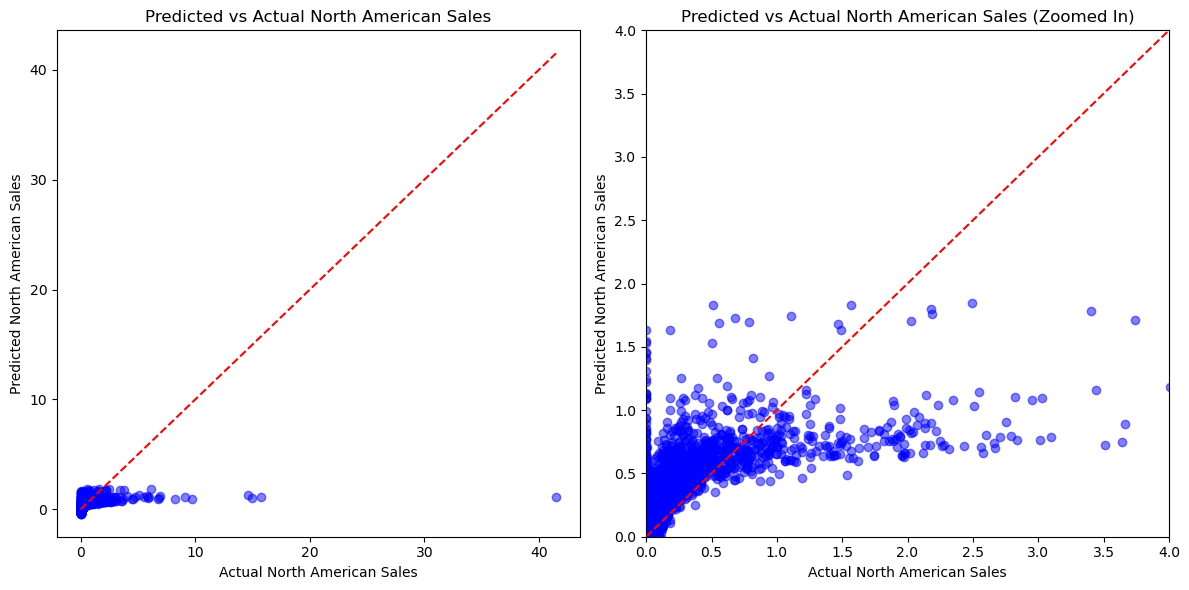

In [16]:
# Plot Predicted vs Actual values
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual North American Sales")
plt.ylabel("Predicted North American Sales")
plt.title("Predicted vs Actual North American Sales")

# Zoom in on typical sales range (adjust as needed)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual North American Sales")
plt.ylabel("Predicted North American Sales")
plt.title("Predicted vs Actual North American Sales (Zoomed In)")
plt.xlim(0, 4)   # show only up to 4 million units
plt.ylim(0, 4)

plt.tight_layout()
plt.show()

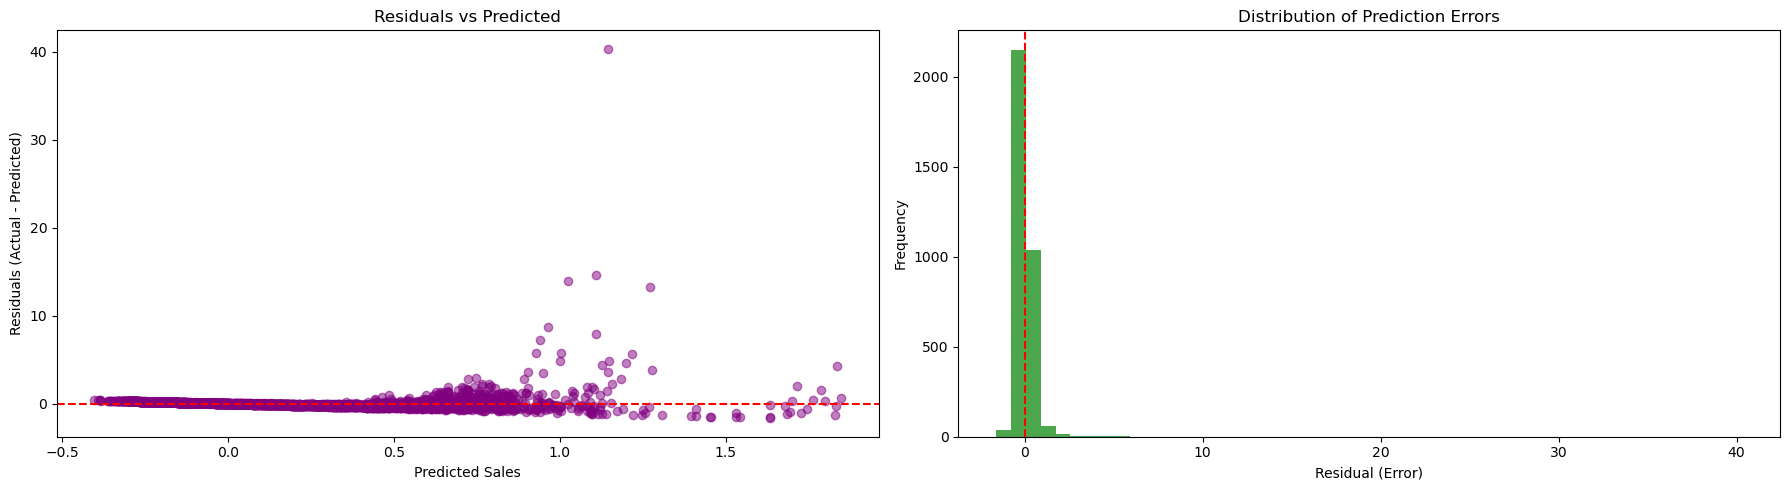

In [17]:
#residuals and distribution of prediction errors

# Compute residuals
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Residuals vs Predicted
axes[0].scatter(y_pred, residuals, alpha=0.5, color='purple')
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel("Predicted Sales")
axes[0].set_ylabel("Residuals (Actual - Predicted)")
axes[0].set_title("Residuals vs Predicted")

# Histogram of residuals
axes[1].hist(residuals, bins=50, color='green', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--')
axes[1].set_xlabel("Residual (Error)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Prediction Errors")

plt.tight_layout()
plt.show()

In [18]:
# Cross-Validation Evaluation 

model = LinearRegression()

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print("North American Sales Baseline Linear Regression -- 5-Fold Cross-Validation:")
print(f"Average MSE: {abs(cv_mse.mean()):.3f}")
print(f"Average R^2: {cv_r2.mean():.3f}")

North American Sales Baseline Linear Regression -- 5-Fold Cross-Validation:
Average MSE: 0.733
Average R^2: -354.593


Mean R^2 is a very large negative number, showing that some folds are predicting terribly, far worse than just predicting the mean North American Sales. One potential cause for this, which can be easily addressed, is extreme skew in the target variable. Game Sales data is likely to be heavy-tailed as certain (extremely popular) games dominate sales totals, while others sell very few. Some folds might randomly include or exclude these blockbuster titles, making variance explode. We will check for skew and address it with a log transformation.

### Try Log Transformation of Target on Baseline Linear Regression

In [19]:
# check global sales variable for skew

print(y.describe())
#make histogram of y

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: North American Sales (in millions), dtype: float64


The maximum North American Sales value is 41.5 (million $), much higher than the mean of 0.265 (million $). The response variable is extremely right-skewed.

In [20]:
#log transform the target
y_log = np.log1p(y)

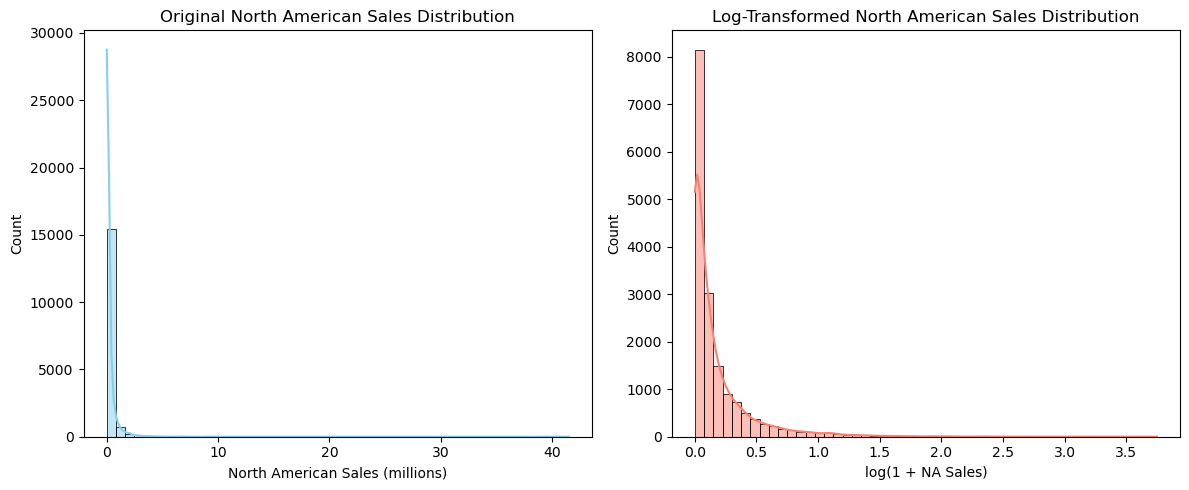

In [21]:
# Visualize transformation

# Plot original vs. log-transformed sales
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
sns.histplot(y, bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Original North American Sales Distribution")
axes[0].set_xlabel("North American Sales (millions)")
axes[0].set_ylabel("Count")

# Log-transformed distribution
sns.histplot(y_log, bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Log-Transformed North American Sales Distribution")
axes[1].set_xlabel("log(1 + NA Sales)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [22]:
# Fit the baseline linear regression model with the log-transformed y 
model = LinearRegression()
model.fit(X, y_log)

# Predict and inverse-transform
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression with Log-Transformed Target:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Linear Regression with Log-Transformed Target:
Mean Squared Error: 0.929
R^2 Score: 0.137


In [23]:
# Cross-Validation Evaluation with log-transformed y
model = LinearRegression()

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_r2 = cross_val_score(model, X, y_log, cv=5, scoring='r2')
cv_mse = cross_val_score(model, X, y_log, cv=5, scoring='neg_mean_squared_error')

print("North American Sales Baseline Linear Regression -- 5-Fold Cross-Validation with log-transformed Target:")
print(f"Average MSE: {abs(cv_mse.mean()):.3f}")
print(f"Average R^2: {cv_r2.mean():.3f}")

North American Sales Baseline Linear Regression -- 5-Fold Cross-Validation with log-transformed Target:
Average MSE: 0.080
Average R^2: -90.336


## Support Vector Machine: SVC

## Decision Tree 

In [24]:
decision_vg = pd.read_csv("video_games_sales.csv") #vg = video games 
decision_vg = decision_vg.rename(columns = {"rank": "Sales Rank", "na_sales": "North American Sales (in millions)", "eu_sales": "European Sales (in millions)", 
                          "jp_sales": "Japan Sales (in millions)", "other_sales": "Other Sales (in millions)", 
                          "global_sales": "Global Sales (in millions)"})
print(f"Columns Names in the Dataframe:\n{decision_vg.columns.tolist()}\n")
print(f"Quantity of of null/missing data entries:\n{decision_vg.isnull().sum()}")
print(f"Data Types and Quantity of Data:\n{decision_vg.info()}\n") #shows all variables in the dataset, the quantity of non-null data points in each variables, and the amount of each data type
print(f"Column Names in the Dataset\n{decision_vg.columns.tolist()}\n")
print("Summary Stats of the Numeric Variables:\n")
decision_vg.describe().T

Columns Names in the Dataframe:
['Sales Rank', 'name', 'platform', 'year', 'genre', 'publisher', 'North American Sales (in millions)', 'European Sales (in millions)', 'Japan Sales (in millions)', 'Other Sales (in millions)', 'Global Sales (in millions)']

Quantity of of null/missing data entries:
Sales Rank                              0
name                                    0
platform                                0
year                                  271
genre                                   0
publisher                              58
North American Sales (in millions)      0
European Sales (in millions)            0
Japan Sales (in millions)               0
Other Sales (in millions)               0
Global Sales (in millions)              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              ------------

,count,mean,std,min,25%,50%,75%,max
Sales Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
North American Sales (in millions),16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
European Sales (in millions),16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
Japan Sales (in millions),16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other Sales (in millions),16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global Sales (in millions),16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [25]:
predictors = decision_vg[["platform", "year", "genre", "publisher", "European Sales (in millions)", "Japan Sales (in millions)"]] #Experiment with "Sales Rank"
response = decision_vg["North American Sales (in millions)"]

#### Encoding the categorical variables

In [26]:
predictors = pd.get_dummies(predictors, columns=['platform', 'genre'], drop_first=True) #One-hot encode low-cardinality features 
                                                                        #(creates a column per category, values become True/False)
#get the mean of North American sales for each publisher
publisher_target_mean = predictors.join(response).groupby("publisher")["North American Sales (in millions)"].mean() 
global_mean = response.mean()
predictors["Mean North American Sales per Publisher"] = predictors["publisher"].map(publisher_target_mean).fillna(global_mean)

In [27]:
label_encoders = {}
for col in predictors.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    predictors[col] = le.fit_transform(predictors[col])
    label_encoders[col] = le

y_encoder = LabelEncoder()
response = y_encoder.fit_transform(response)

#### Building the Decision Tree

In [28]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.2, random_state = 42)

In [29]:
na_decision = DecisionTreeRegressor(random_state = 42) #DecisionTreeRegressor is made for continuous variables 
na_decision.fit(X_train, y_train)
y_pred = na_decision.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  #Mean Squared Error is a common metric for regression
print(f"Mean Squared Error: {mse:.5f}\n")

r2 = r2_score(y_test, y_pred) #Evaluates the model accuracy
n = len(y_test) #number of samples
p = X_test.shape[1] #number of predictors 
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1) #calculate adjusted R²
print(f"R² Score: {r2:.5f}")
print(f"Adjusted R² Score: {r2_adj:.5f}")

Mean Squared Error: 1030.59691

R² Score: 0.57616
Adjusted R² Score: 0.57020


The Decision Tree does better than 50%-50% random guessing; however, its accuracy is still quite low. Overall, a 58% accuracy is far better than the baseline Linear Regression model, further proving the need for more complex models.

In [30]:
cross_val_r2 = cross_val_score(na_decision, predictors, response, cv=5, scoring='r2')
print(f"Cross-validated R² Scores: {cross_val_r2}\n")
print(f"Mean Cross-validated R²: {cross_val_r2.mean():.5f}\n")
print(f"Standard Deviation of R² Scores: {cross_val_r2.std():.5f}\n")

Cross-validated R² Scores: [  -0.7815804   -15.31288601  -25.06249417  -45.72307349 -240.4861996 ]

Mean Cross-validated R²: -65.47325

Standard Deviation of R² Scores: 88.71720



In [31]:
depth_val = np.arange(2,16)
leaf_val = np.arange(1,21, step=10)

grid_s = [{'max_depth': depth_val,'min_samples_leaf': leaf_val}]
model = tree.DecisionTreeRegressor(criterion='friedman_mse')

cv_tree = GridSearchCV(estimator=model,param_grid=grid_s,cv=ms.KFold(n_splits=10))
cv_tree.fit(X_train, y_train)

best_depth = cv_tree.best_params_['max_depth']

best_min_samples = cv_tree.best_params_['min_samples_leaf']

print(best_depth, best_min_samples)

final_model = tree.DecisionTreeRegressor(
    criterion='friedman_mse',
    max_depth=best_depth,
    min_samples_leaf=best_min_samples,
    random_state=123
)
final_model.fit(X_train, y_train)

11 11


DecisionTreeRegressor(criterion='friedman_mse', max_depth=np.int64(11),
                      min_samples_leaf=np.int64(11), random_state=123)

#### Visualizing the Decision Tree

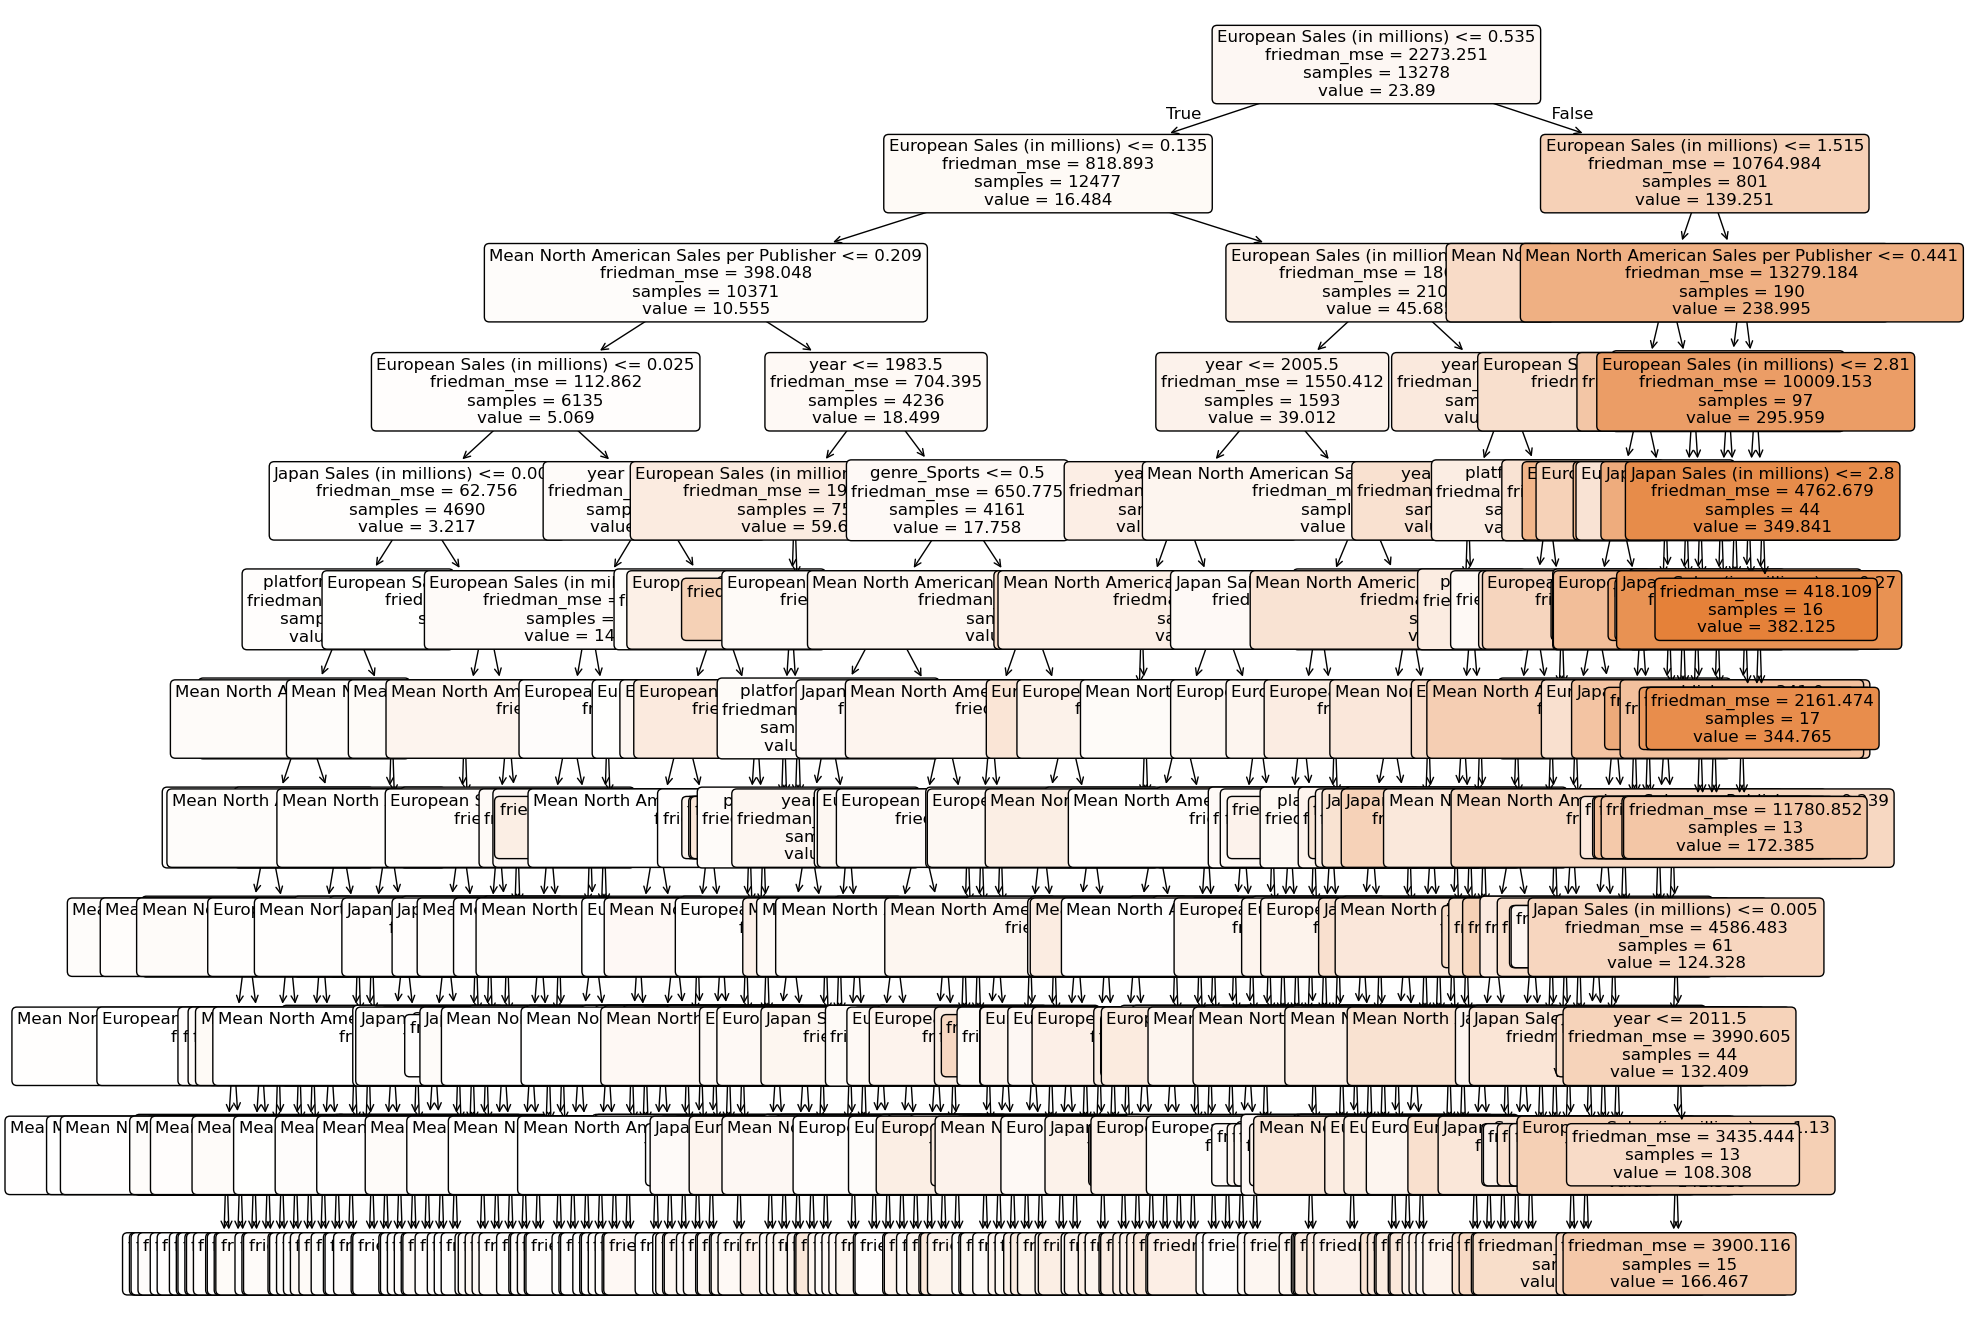

In [32]:
plt.figure(figsize=(20,17))
tree.plot_tree(
    final_model,
    feature_names=predictors.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
#plt.savefig("Feature Importance in Predicting North American Video Game Sales_DataPreprocessed.png", bbox_inches = "tight", dpi = 300)
plt.show()

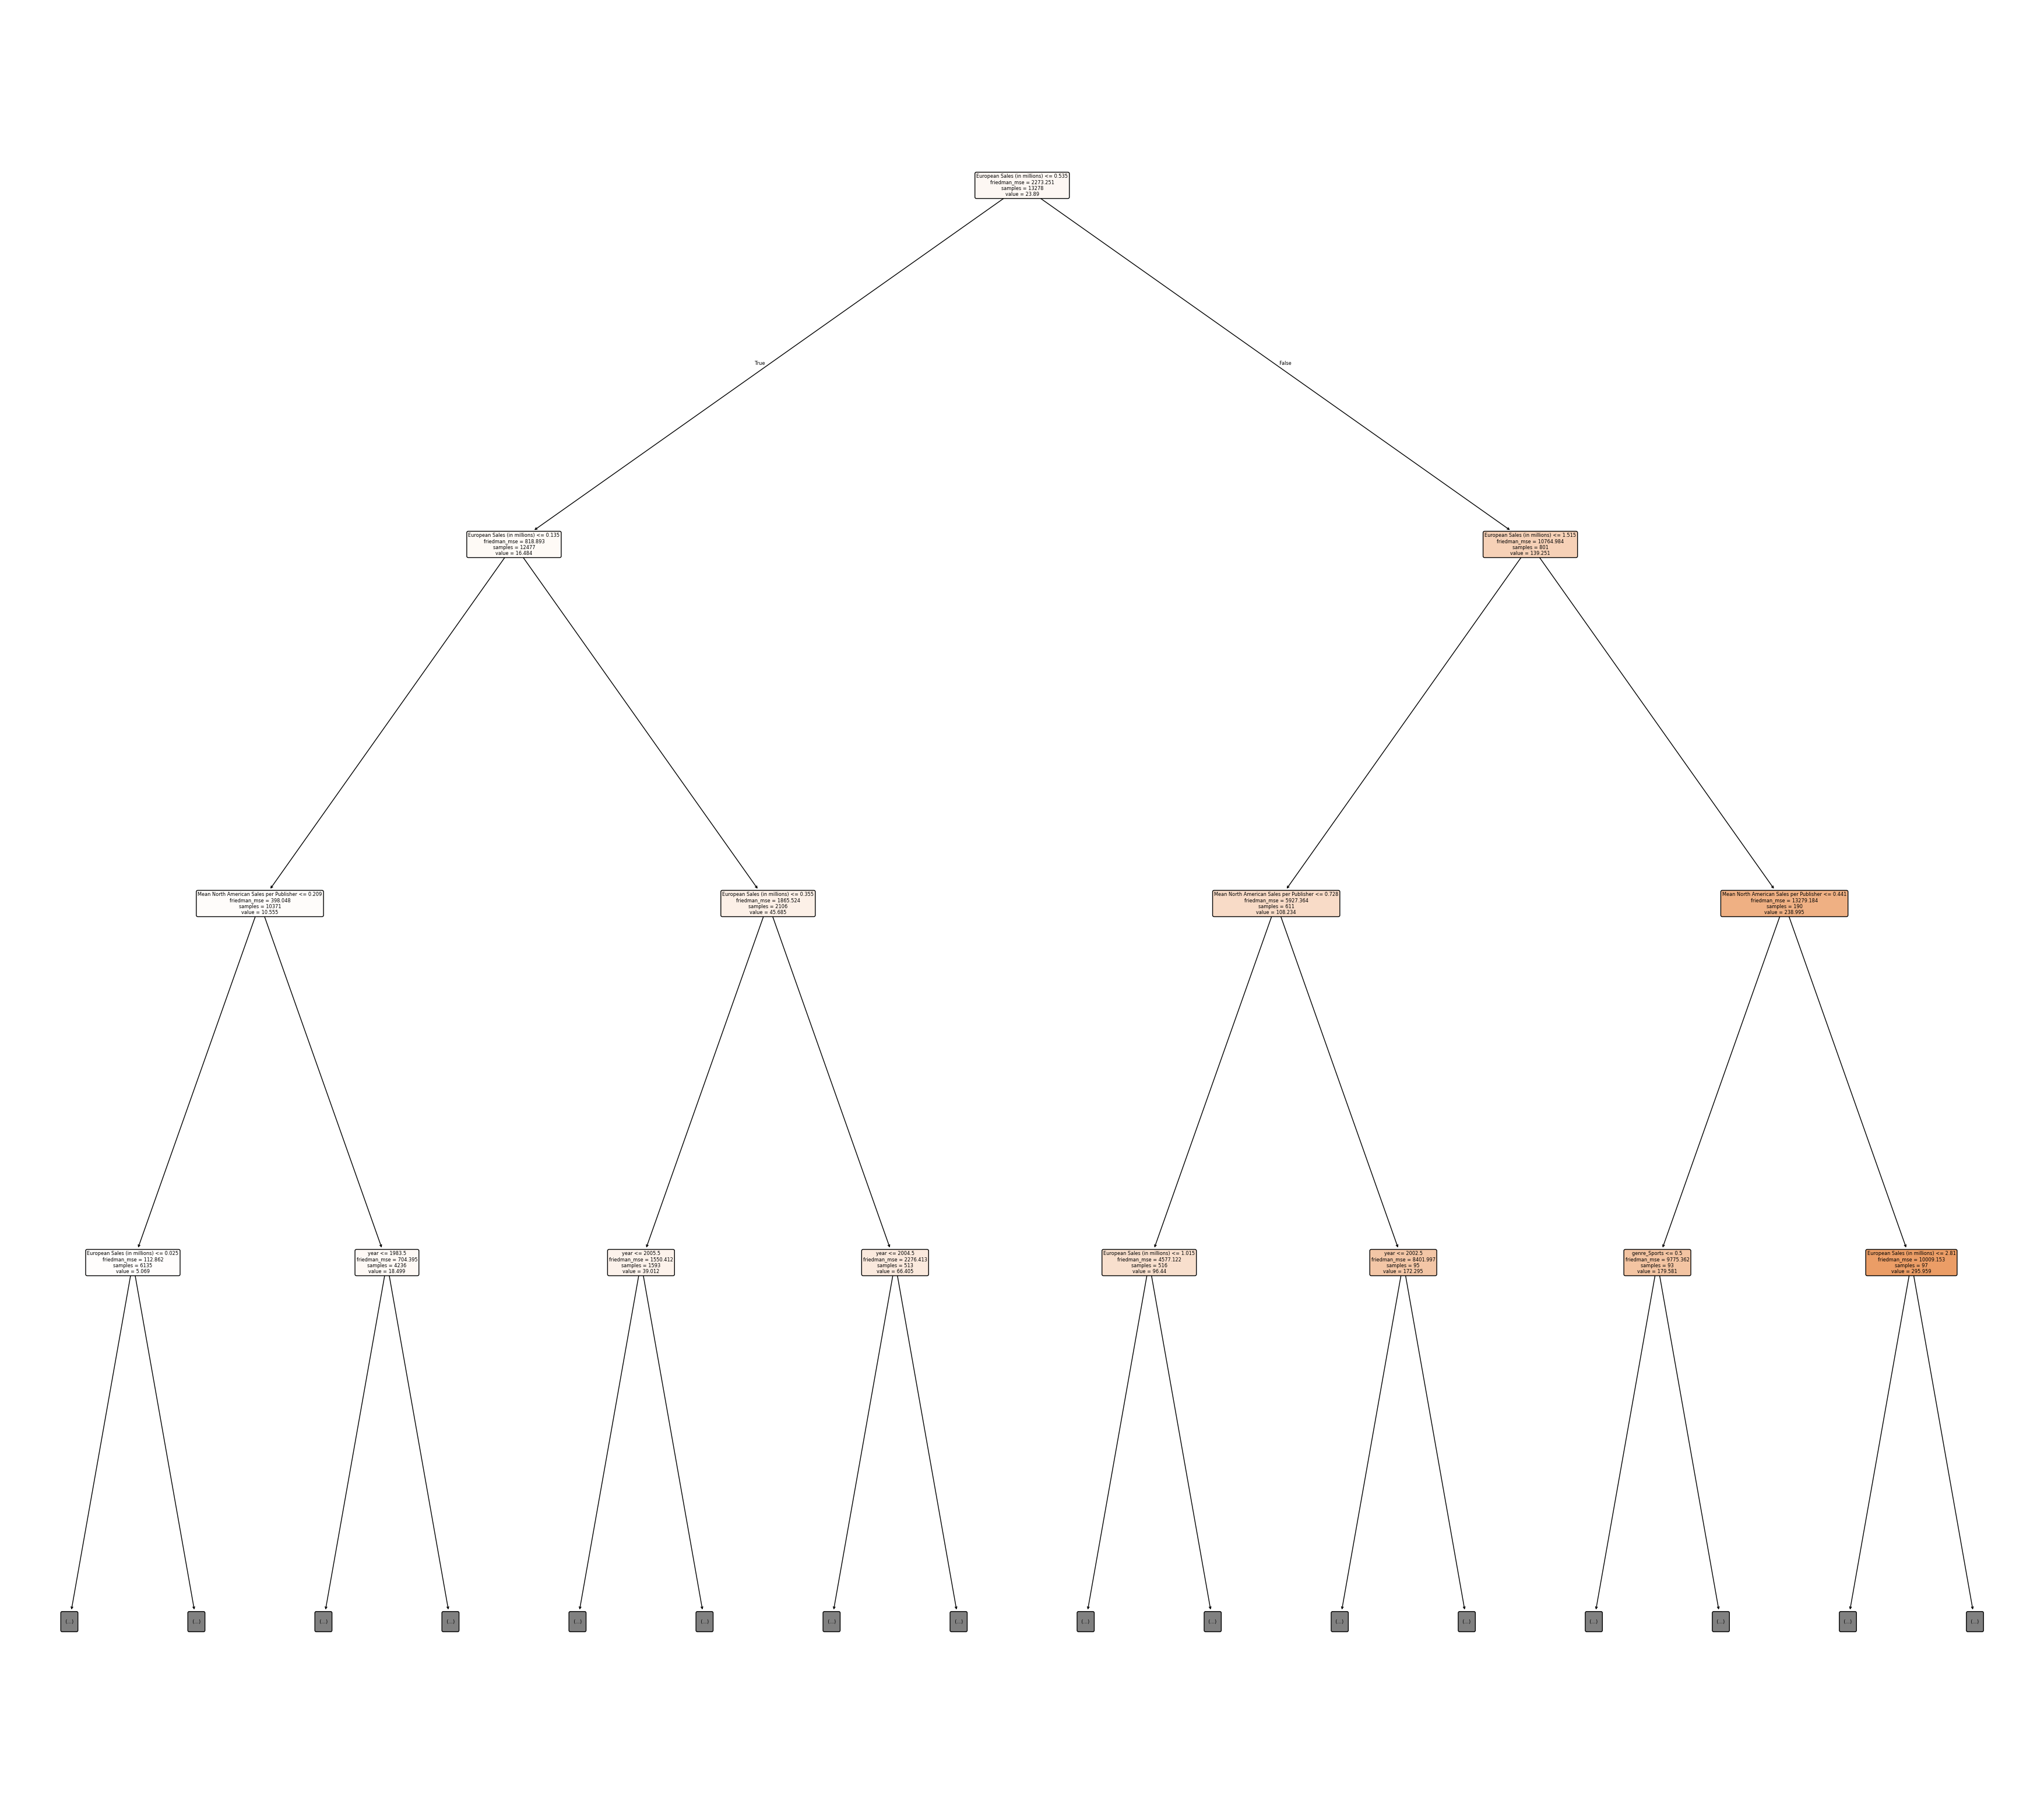

In [33]:
plt.figure(figsize=(45,40))
tree.plot_tree(final_model, max_depth=3, feature_names=predictors.columns, filled=True, rounded=True)
#plt.title("Decision Tree (Top 3 Levels)")
plt.savefig("Decision Tree (Top 3 Levels).png", bbox_inches = "tight", dpi = 300)
plt.show()

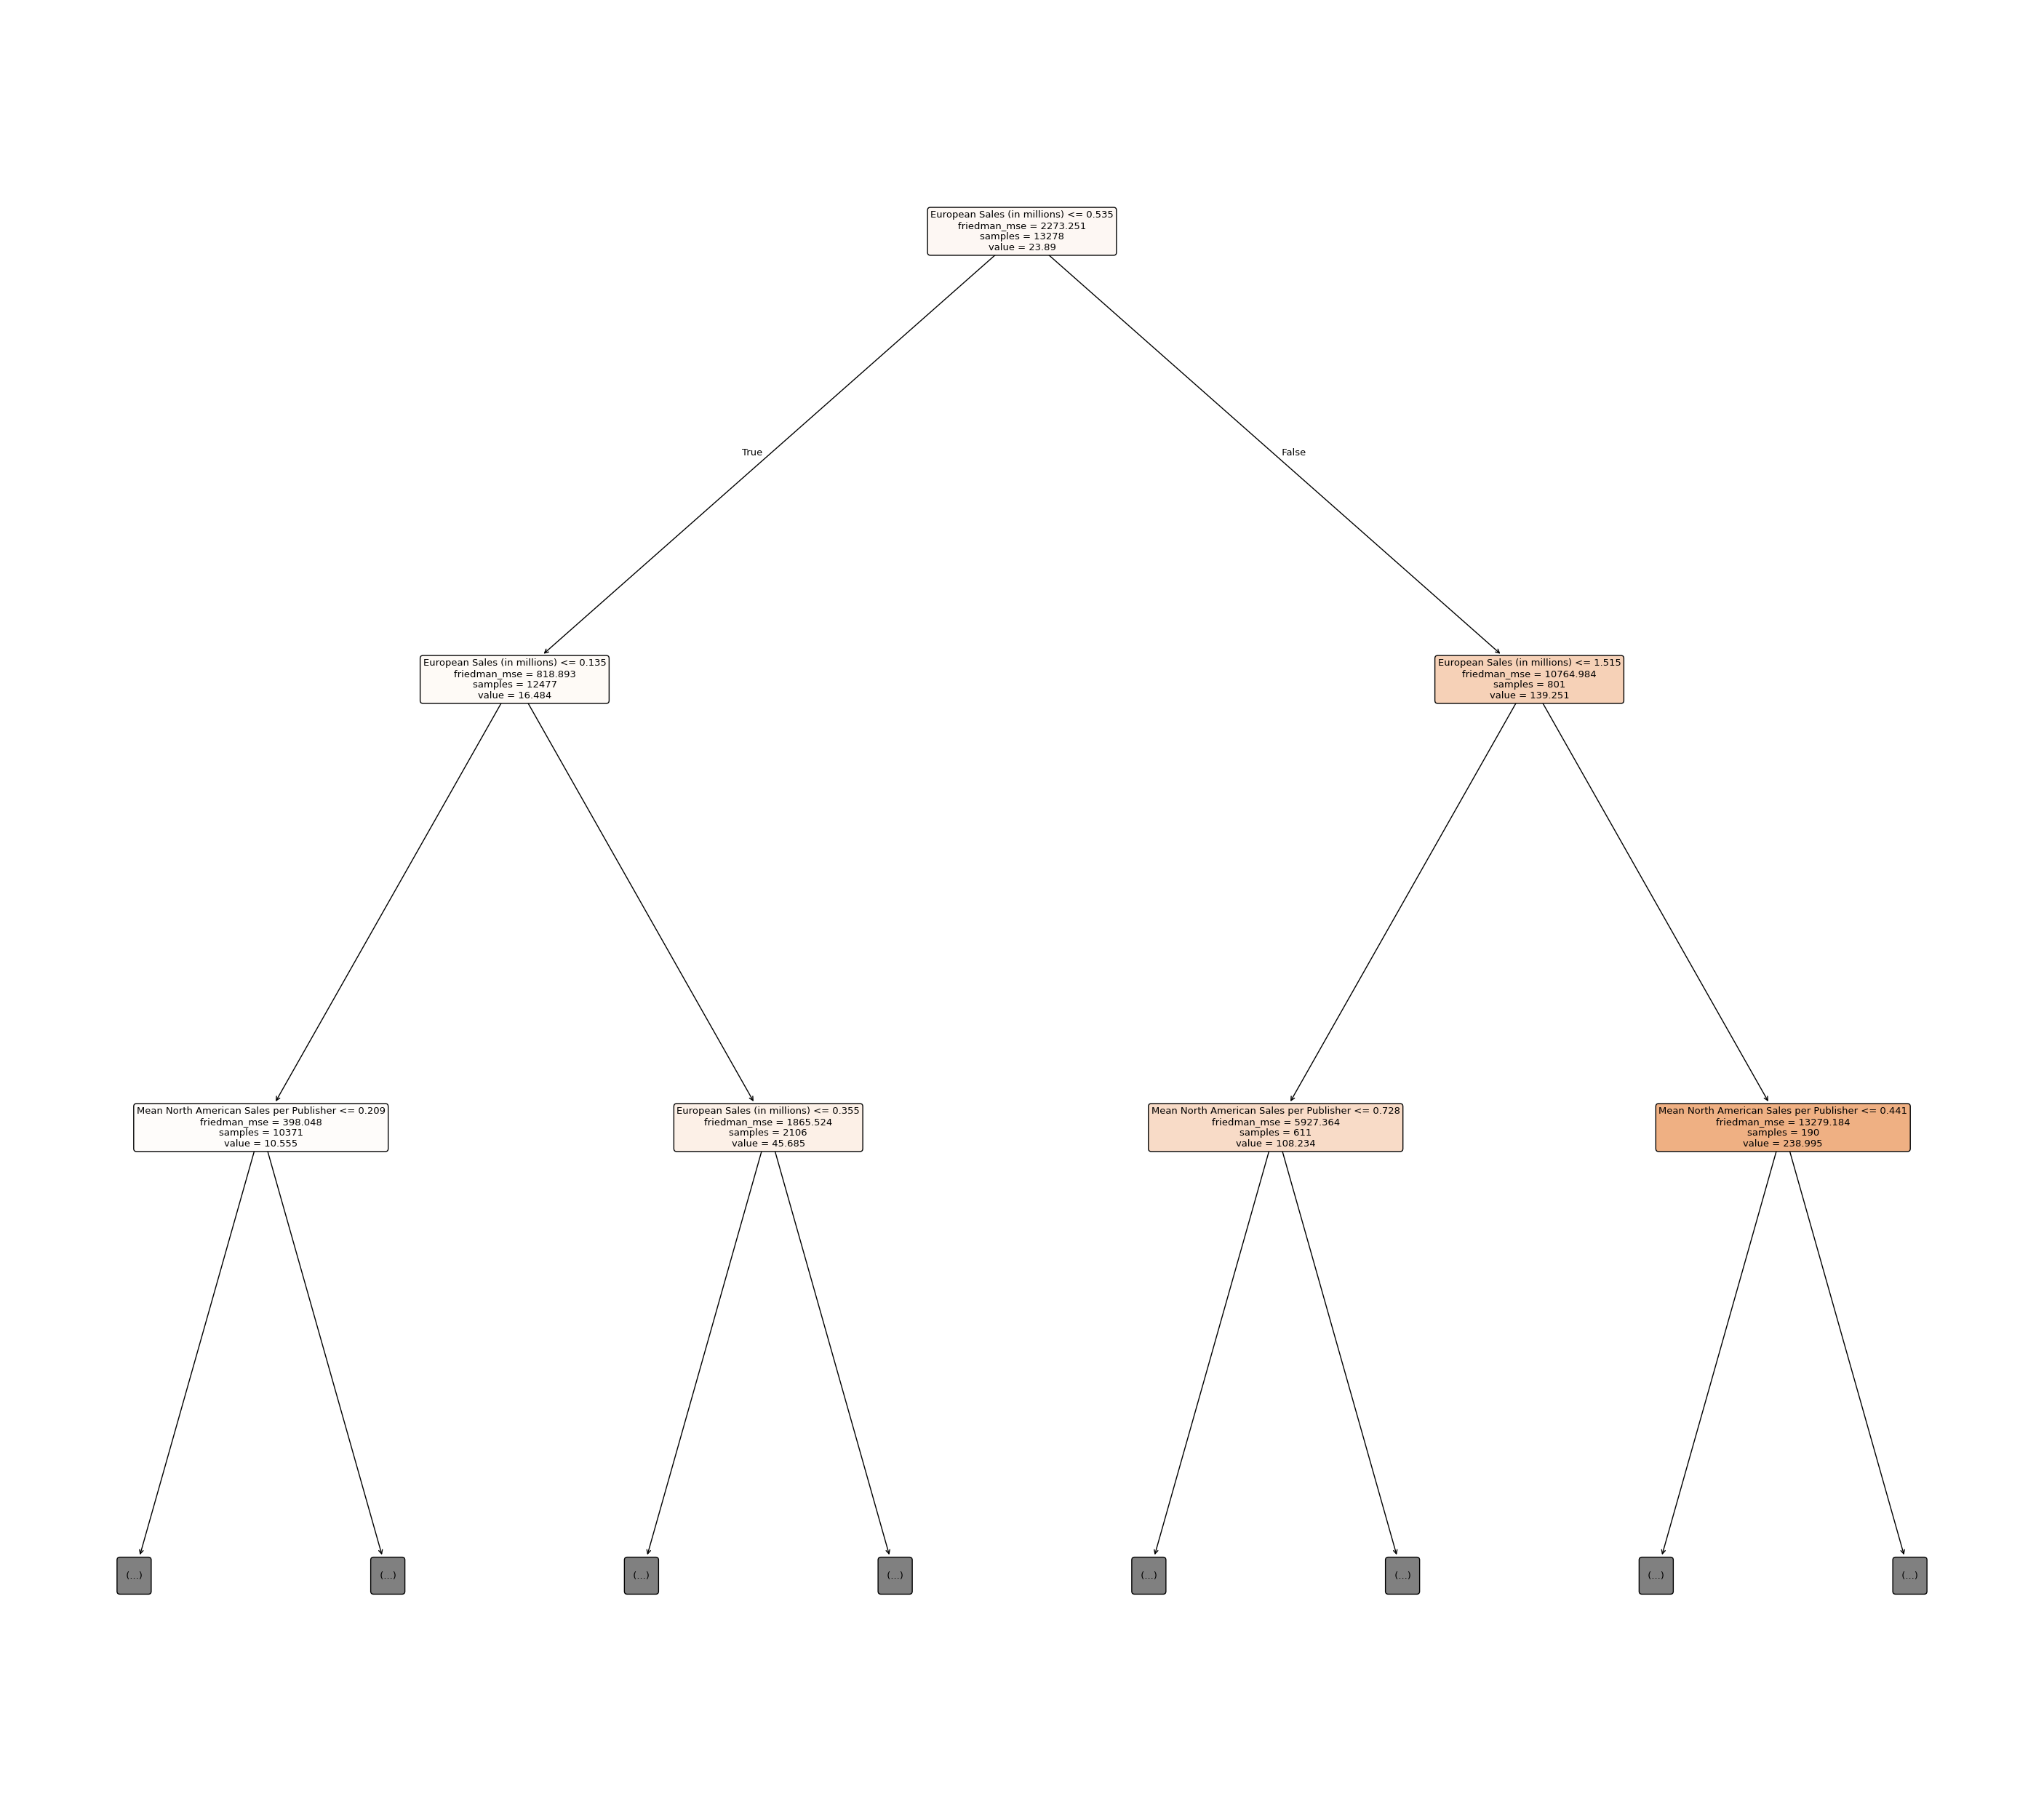

In [34]:
plt.figure(figsize=(36,32))
tree.plot_tree(final_model, max_depth=2, feature_names=predictors.columns, filled=True, rounded=True)
#plt.title("Decision Tree (Top 2 Levels)")
plt.savefig("Decision Tree (Top 2 Levels).png", bbox_inches = "tight", dpi = 300)
plt.show()

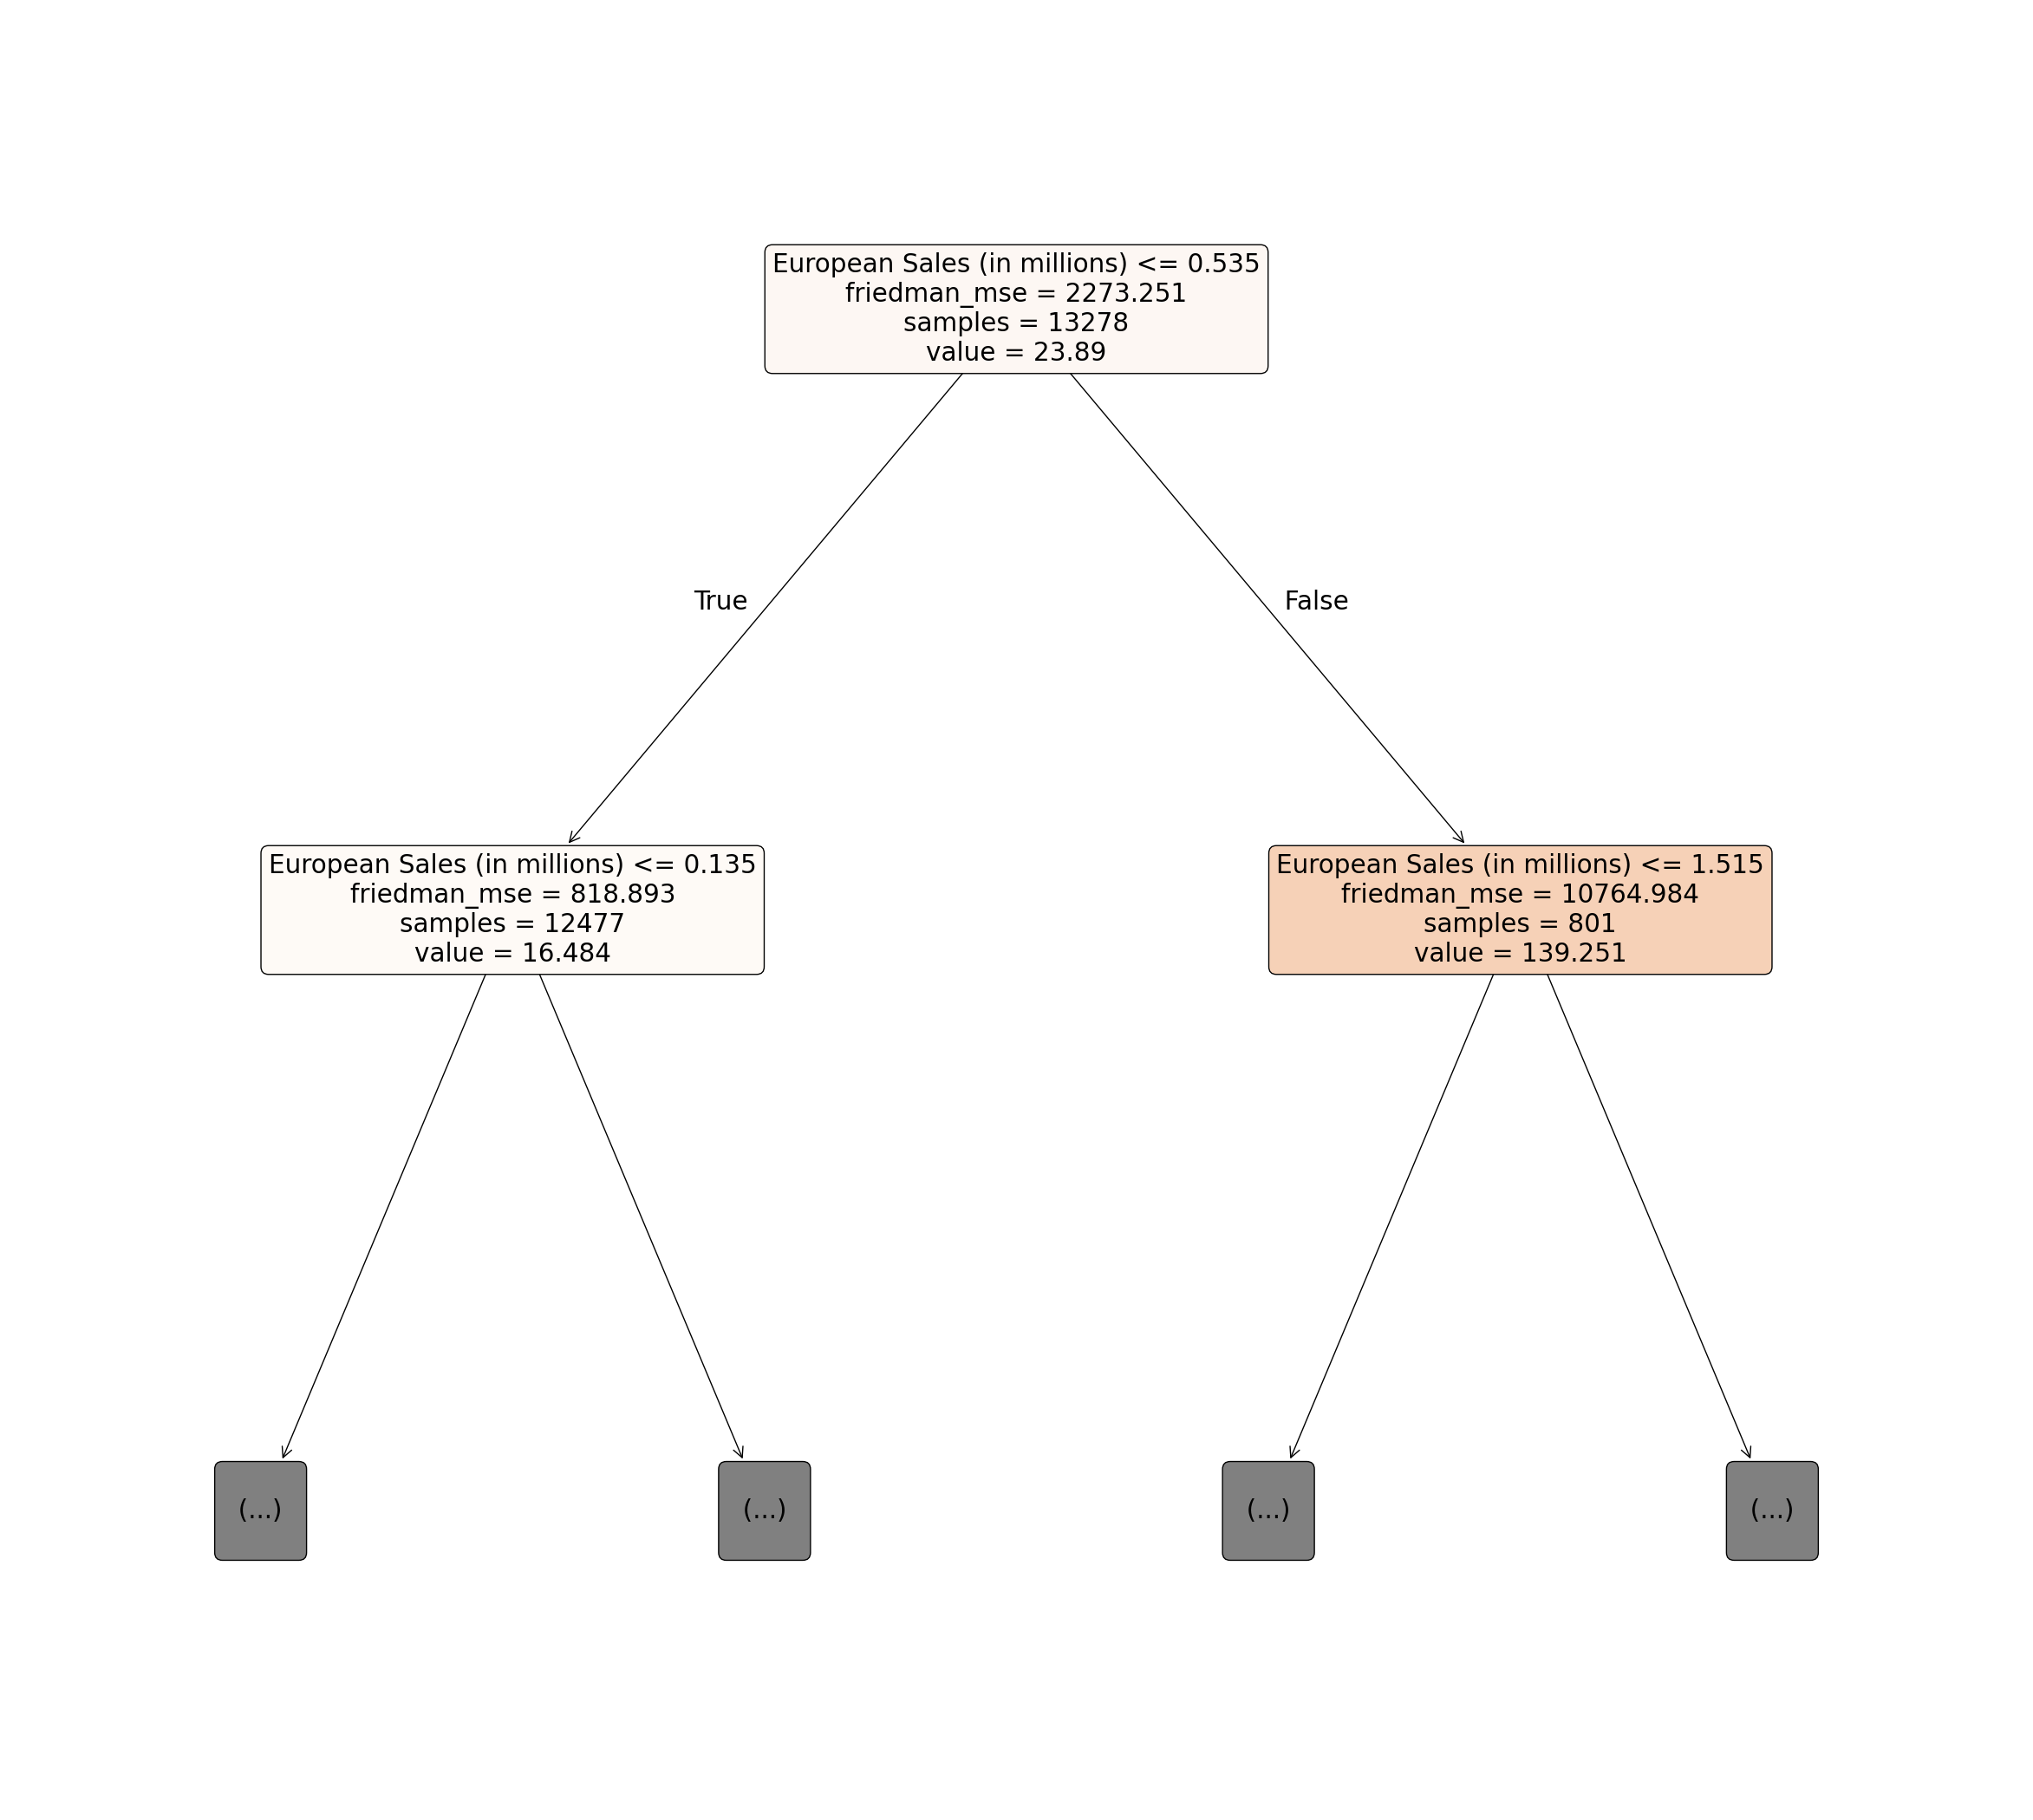

In [35]:
plt.figure(figsize=(30, 27))
tree.plot_tree(final_model, max_depth=1, feature_names=predictors.columns, filled=True, rounded=True)
#plt.title("Decision Tree (Top 1 Level)")
plt.savefig("Decision Tree (Top 1 Level).png", bbox_inches = "tight", dpi = 300)
plt.show()

In [36]:
# Predictions
Y_pred = final_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.5f}")
print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")

R² Score: 0.68877
MSE: 756.77552
RMSE: 27.50955


Pruning the tree yields higher model accuracy, with a 68% - 70% model accuracy. The increased accuracy suggests that Random orest may be a better model for analyzing the data.

## Random Forest

The function below imputes missing values for the 'year' and 'publisher' columns. This code was written as a function to improve legibility of main code.

In [10]:
def impute_vals(df, fit = None, transform = False):
    missing_loc = df.isna()
   
    # updating missing publisher vals to unknown
    missing = df.loc[missing_loc['publisher'] == True]
    missing.loc[:, 'publisher'] = 'unknown'
    df.update(missing)
    
    missing = df.loc[missing_loc['year'] == True]
    if transform: # set avg release year of each platform for test set
        missing.drop(columns = 'year', inplace = True) 
        missing['year'] = missing['platform']
        missing.replace(fit, inplace = True)
        df.update(missing)
    else: # get and set avg release year of each platform for training set
        yr_avgs = df[['year','platform']].groupby('platform').mean()
        np.rint(yr_avgs, out = yr_avgs)
        yr_avgs = yr_avgs.to_dict()
        missing.loc[:,'year'] = missing['platform']
        missing.replace(yr_avgs, inplace = True)
        df.update(missing)

    # set missing years for obs that have year in title
    yr_fmts = r'(19|20)(\d{2})|(?<=\s)([0-2]|[8-9])[0-9](?=\Z|\s)|(?<=2k|2K)(\d+)'
    matches = list(map(lambda x: re.search(yr_fmts, x), missing['name']))
    matches = pd.Series(data = map(lambda x: x.group() if x != None else None,
                                   matches), index = missing.index, name = 'year').dropna()
    matches = matches.astype('int64').sub(1)
    matches.loc[(matches < 100) & (matches > 79)] += 1900
    matches.loc[matches < 79] += 2000
    df.update(matches)

    # i happened to look up the release years for two random games missing their years,
    # so i manually imputed the data
    if 2497 in df.index:
        df.at[2497, 'year'] = 2002
    if 12015 in df.index:
        df.at[12015, 'year'] = 2003
    
    if transform:       
        return df # return df with updated values only
    else:
        return df, yr_avgs # return df with updated values and fit of average year of release for each platform

Here, we are reading in the data, dropping features that will not be used for random forest, and creating a list of the names of categorical features in order to target encode them later. Additionally, because of the scope of this project, we have opted to ignore warnings because impute_vals() raises a pandas warning due to depreciated behavior, despite functioning as intended.

In [4]:
import os
os.chdir('/Users/presleywhitehead/Desktop/sta4724 project')

In [14]:
warnings.filterwarnings('ignore')
df = pd.read_csv('./video_games_sales.csv')
df.drop(columns = ['other_sales','global_sales', 'rank'], inplace = True)
cats = ['genre','publisher','platform']

Now, we're splitting the data into testing/training X and y sets and doing further cleaning. We imputed and fit missing values to the training set using impute_vals(), then imputed the missing values in the test set using the fit from before. Similarly, we fit and transformed categorical variables from the training set using TargetEncoder, then transformed the categorical variables in the test set using the fit from before. We also dropped the 'name' column from the X sets as it did not make sense to include for random forest.

In [15]:
X = df.drop(columns = 'na_sales')
y = df.loc[:, 'na_sales']
SEED = 1

# 20/80 test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
    random_state = SEED)

#imputing missing values in both X sets
X_train, iv_fit = impute_vals(X_train)
X_test = impute_vals(X_test, fit = iv_fit, transform = True)

# dropping name column
X_train.drop(columns = 'name', inplace = True)
X_test.drop(columns = 'name', inplace = True)

# target encoding categorical variables in both X sets
te = TargetEncoder(target_type='continuous', random_state = SEED)
X_train.loc[:, cats] = te.fit_transform(X_train[cats], y_train)
X_test.loc[:, cats] = te.transform(X_test[cats])

Below, we're instantiating and fitting our RandomForestRegressor. We can observe that it yields a mean squared error of 0.2 and an r squared of 0.659. We can say that the random forest model explains 65.9% of the variation in North American video games sales.

In [22]:
rf = RandomForestRegressor(n_estimators = 100, random_state = SEED)
clf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r_squared = rf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}, R^2: {r_squared}')

MSE: 0.2008986405350183, R^2: 0.658972335603831


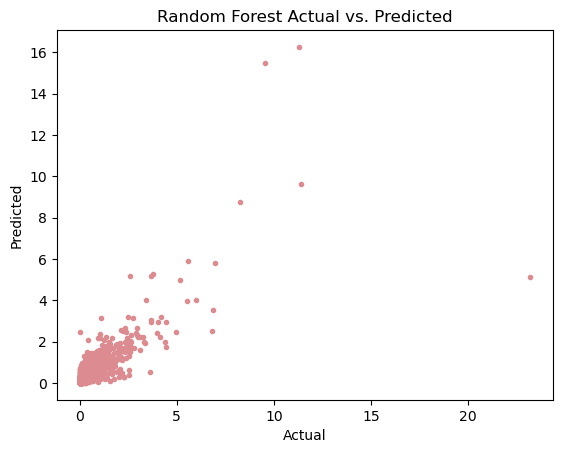

<Figure size 640x480 with 0 Axes>

In [19]:
# actual vs predicted
plt.scatter(y_test, y_pred, marker = '.', c = '#DC8C91')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Actual vs. Predicted')
plt.show()
plt.clf()

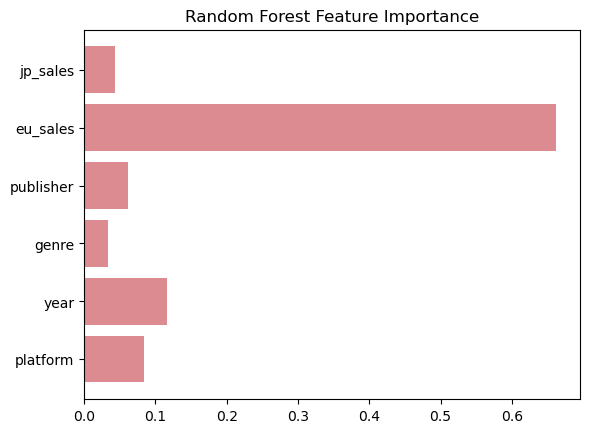

<Figure size 640x480 with 0 Axes>

In [20]:
# feature importance
importance = rf.feature_importances_
importance_dct = dict(zip(X_train.columns, importance))
plt.barh(list(importance_dct.keys()), list(importance_dct.values()), color = '#DC8C91')
plt.title('Random Forest Feature Importance')
plt.show()
plt.clf()

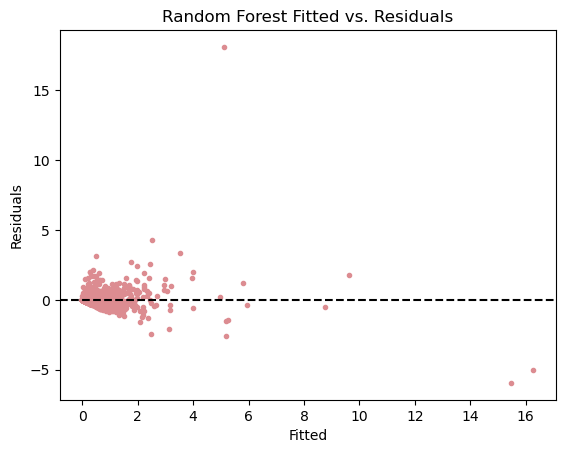

<Figure size 640x480 with 0 Axes>

In [21]:
# fitted vs residuals
resids = y_test - y_pred
plt.scatter(y_pred, resids, marker = '.', c = '#DC8C91')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('Random Forest Fitted vs. Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()
plt.clf()
